In [1]:
"""
Kernel density estimation plot between feature & target feature using Seaborn
==========================================================
Plotting the KDE plot between feature & target feature using Seaborn.
"""
# Authors: Muz Ahmad

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
plt.style.use('bmh')
df = pd.read_csv('house-price.csv')

# Remove Id and the features with 30% or less NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Id']
print("List of dropped columns:", end=" ")

for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

# List data type of all features
list(set(df.dtypes.tolist()))

# Include features with numerical data only
df_num = df.select_dtypes(include = ['float64', 'int64'])

List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, 



In [2]:
# Find features that are strongly correlated with target feature (Corr coefficient > 0.5)
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


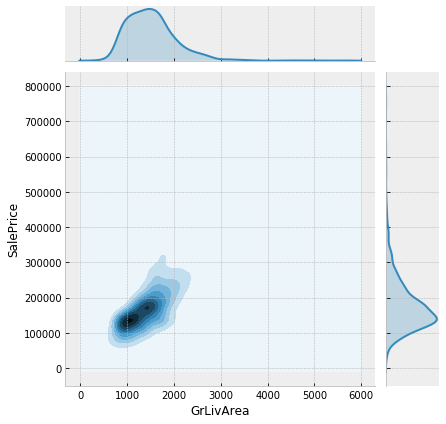

In [6]:
# Plot KDE
sns.jointplot(x="GrLivArea", y="SalePrice", data=df, kind="kde");